Read Data
Selecting  100
Training...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.001 Validation score  0.776411111111
predict and write to file
0.001 Validation score  0.784111111111
predict and write to file
0.001 Validation score  0.791844444444
predict and write to file
0.001 Validation score  0.793611111111
predict and write to file


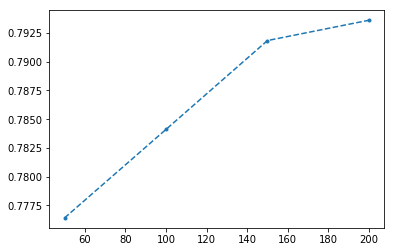

Selecting  120
Training...
0.001 Validation score  0.781811111111
0.001 Validation score  0.791844444444
0.001 Validation score  0.794633333333
predict and write to file
0.001 Validation score  0.796466666667
predict and write to file


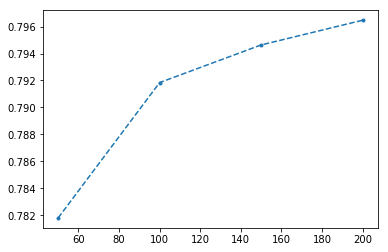

Selecting  140
Training...
0.001 Validation score  0.782044444444
0.001 Validation score  0.794744444444
0.001 Validation score  0.796355555556
0.001 Validation score  0.797955555556
predict and write to file


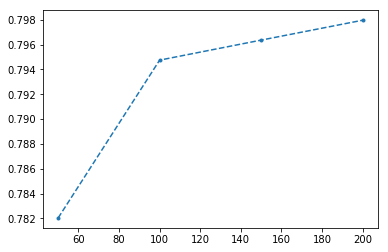

In [4]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("trainFeatures.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabel.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validationFeatures.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)

# Select features
k = [100,120,140]
max = 0
for j in range(len(k)):
    print('Selecting ', k[j])
    selection = SelectKBest(k=k[j]).fit(n_trainX, trainLabel)
    n_trainX_new = selection.transform(n_trainX)
    n_testX_new = selection.transform(n_testX)
    n_testdata_new = selection.transform(n_testdata)

    print('Training...')
    iter = [50,100,150,200]
    score = []
    for i in range(len(iter)):
        mlp = MLPClassifier(verbose=0, random_state=0, max_iter=iter[i], 
                            solver='adam', learning_rate_init=0.0001,alpha=0.001)


        mlp.fit(n_trainX_new, trainLabel)
        score.append(mlp.score(n_testX_new, testLabel))
        print('0.001 Validation score ', score[i])
        if (score[i] > max):
            max = score[i]
            print('predict and write to file')
            result = mlp.predict(n_testdata_new)
            numpy.savetxt('result.csv', result, delimiter=',', fmt='%d') 

    plt.plot(iter, score, '--.')
    plt.show()


Read Data
n_components  50
Training...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.001 Validation score  0.766466666667
predict and write to file
0.001 Validation score  0.777633333333
predict and write to file
0.001 Validation score  0.776744444444
0.001 Validation score  0.775433333333
0.001 Validation score  0.776122222222


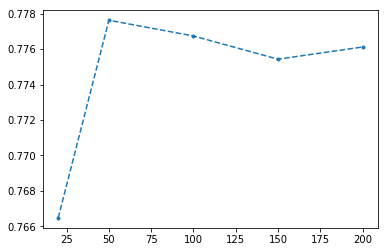

n_components  100
Training...
0.001 Validation score  0.762888888889
0.001 Validation score  0.785488888889
predict and write to file
0.001 Validation score  0.784566666667
0.001 Validation score  0.779588888889
0.001 Validation score  0.776722222222


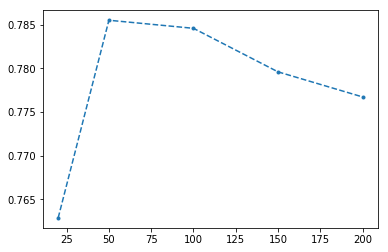

n_components  120
Training...
0.001 Validation score  0.754033333333
0.001 Validation score  0.7841
0.001 Validation score  0.781933333333
0.001 Validation score  0.776988888889
0.001 Validation score  0.773211111111


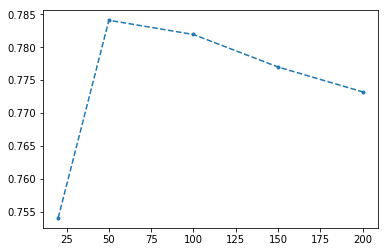

n_components  140
Training...
0.001 Validation score  0.745511111111
0.001 Validation score  0.785355555556
0.001 Validation score  0.781666666667


In [ ]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("trainFeatures.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabel.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validationFeatures.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)

# Select features
k = [50,100,120,140]
max = 0
for j in range(len(k)):
    print('n_components ', k[j])
    pca = PCA(n_components=k[j], svd_solver='randomized',
              whiten=True)
    pca.fit(n_trainX, trainLabel)
    n_trainX_new = pca.transform(n_trainX)
    n_testX_new = pca.transform(n_testX)
    n_testdata_new = pca.transform(n_testdata)
    
    
    print('Training...')
    iter = [20,50,100,150,200]
    score = []
    for i in range(len(iter)):
        mlp = MLPClassifier(verbose=0, random_state=0, max_iter=iter[i], 
                            solver='adam', learning_rate_init=0.0001,alpha=0.0001)


        mlp.fit(n_trainX_new, trainLabel)
        score.append(mlp.score(n_testX_new, testLabel))
        print('0.001 Validation score ', score[i])
        if (score[i] > max):
            max = score[i]
            print('predict and write to file')
            result = mlp.predict(n_testdata_new)
            numpy.savetxt('result.csv', result, delimiter=',', fmt='%d') 

    plt.plot(iter, score, '--.')
    plt.show()
